<a href="https://colab.research.google.com/github/Zeljko12980/ai-learning-journey/blob/main/MooresLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv



File ‘moore.csv’ already there; not retrieving.



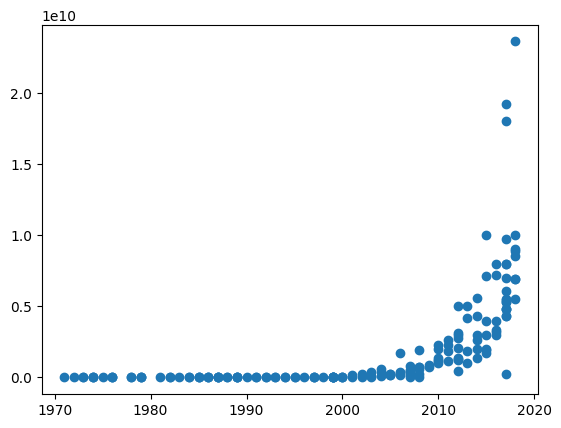

In [8]:
#load in the data
data=pd.read_csv('moore.csv',header=None).values
x=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)

#plot the data it's exponential
plt.scatter(x,y)

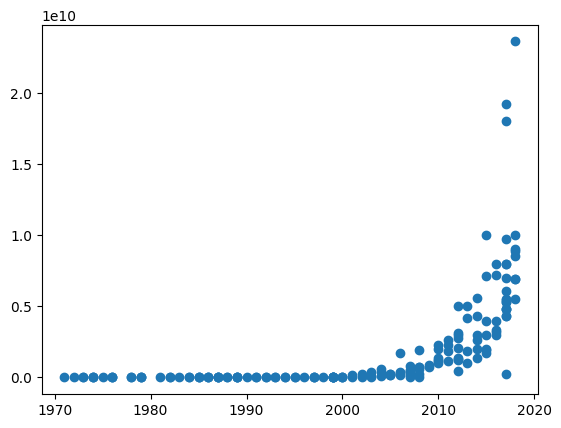

In [9]:
##since we want a linear model, let's take thee log
Y=np.log(y)
plt.scatter(x,y)

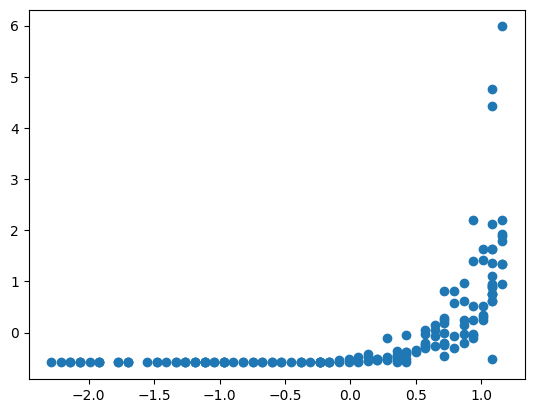

In [10]:
#scale and center both the x, and y axes

mx=x.mean()
sx=x.std()
my=y.mean()
sy=y.std()
x=(x-mx)/sx
y=(y-my)/sy

#everything is centered and in small range

plt.scatter(x,y)

In [26]:
#cast to float32
x=x.astype(np.float32)
y=y.astype(np.float32)

#create the linear regression model
model=nn.Linear(1,1)

#loss and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.7)

inputs=torch.from_numpy(x)
targets=torch.from_numpy(y)

type(inputs)

torch.Tensor

Epoch: 1/100. Loss: 1.1386
Epoch: 2/100. Loss: 1.1200
Epoch: 3/100. Loss: 1.0896
Epoch: 4/100. Loss: 1.0528
Epoch: 5/100. Loss: 1.0132
Epoch: 6/100. Loss: 0.9738
Epoch: 7/100. Loss: 0.9360
Epoch: 8/100. Loss: 0.9011
Epoch: 9/100. Loss: 0.8693
Epoch: 10/100. Loss: 0.8410
Epoch: 11/100. Loss: 0.8160
Epoch: 12/100. Loss: 0.7942
Epoch: 13/100. Loss: 0.7753
Epoch: 14/100. Loss: 0.7590
Epoch: 15/100. Loss: 0.7451
Epoch: 16/100. Loss: 0.7332
Epoch: 17/100. Loss: 0.7231
Epoch: 18/100. Loss: 0.7146
Epoch: 19/100. Loss: 0.7073
Epoch: 20/100. Loss: 0.7012
Epoch: 21/100. Loss: 0.6961
Epoch: 22/100. Loss: 0.6917
Epoch: 23/100. Loss: 0.6881
Epoch: 24/100. Loss: 0.6850
Epoch: 25/100. Loss: 0.6824
Epoch: 26/100. Loss: 0.6802
Epoch: 27/100. Loss: 0.6784
Epoch: 28/100. Loss: 0.6769
Epoch: 29/100. Loss: 0.6756
Epoch: 30/100. Loss: 0.6745
Epoch: 31/100. Loss: 0.6736
Epoch: 32/100. Loss: 0.6729
Epoch: 33/100. Loss: 0.6723
Epoch: 34/100. Loss: 0.6717
Epoch: 35/100. Loss: 0.6713
Epoch: 36/100. Loss: 0.6709
E

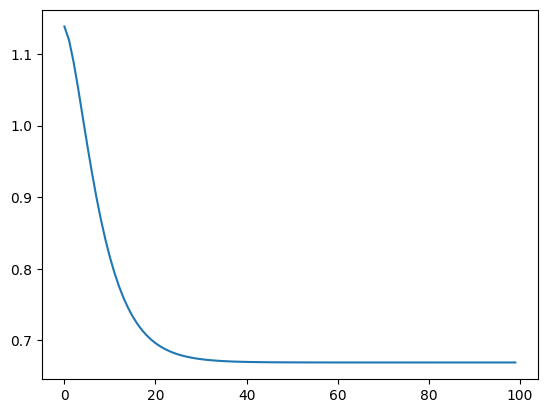

In [27]:
#test the model

n_epochs=100
losses=[]

for it in range(n_epochs):
  optimizer.zero_grad()

  #forward pass
  outputs=model(inputs)
  loss=criterion(outputs,targets)

  #record the loss
  losses.append(loss.item())

  #backward and optimizer
  loss.backward()
  optimizer.step()

  print(f'Epoch: {it+1}/{n_epochs}. Loss: {loss.item():.4f}')

#loss per iteration
plt.plot(losses)


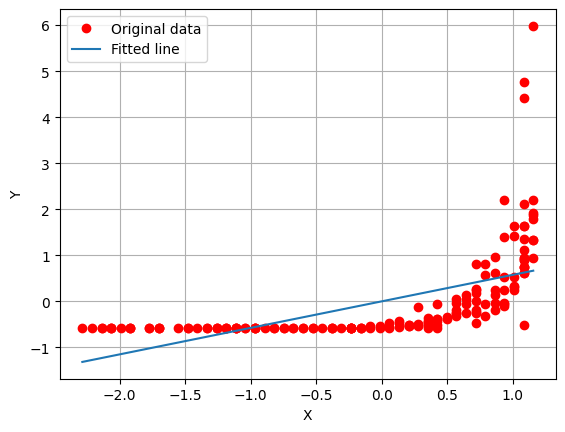

In [22]:
#plot the graph

predicted=model(torch.from_numpy(x)).detach().numpy()
plt.plot(x,y,'ro',label='Original data')
plt.plot(x,predicted,label='Fitted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


In [28]:
w=model.weight.data.numpy()
print(w)

a=w[0,0]*(sy/sx)

print("Time to double: ",np.log(2)/a)

[[0.57521147]]
Time to double:  4.576873503305519e-09
